#### Importing libs

In [1]:
from core.neo4jHandler import GraphBuilder
from decouple import config

#### Load Env Vars

In [2]:
URI = config("URI")
USER = config("USER")
PASSWORD = config("PASSWORD")

#### Instanciate object

In [3]:
graph_builder = GraphBuilder(uri=URI, user=USER, password=PASSWORD)

#### View graph

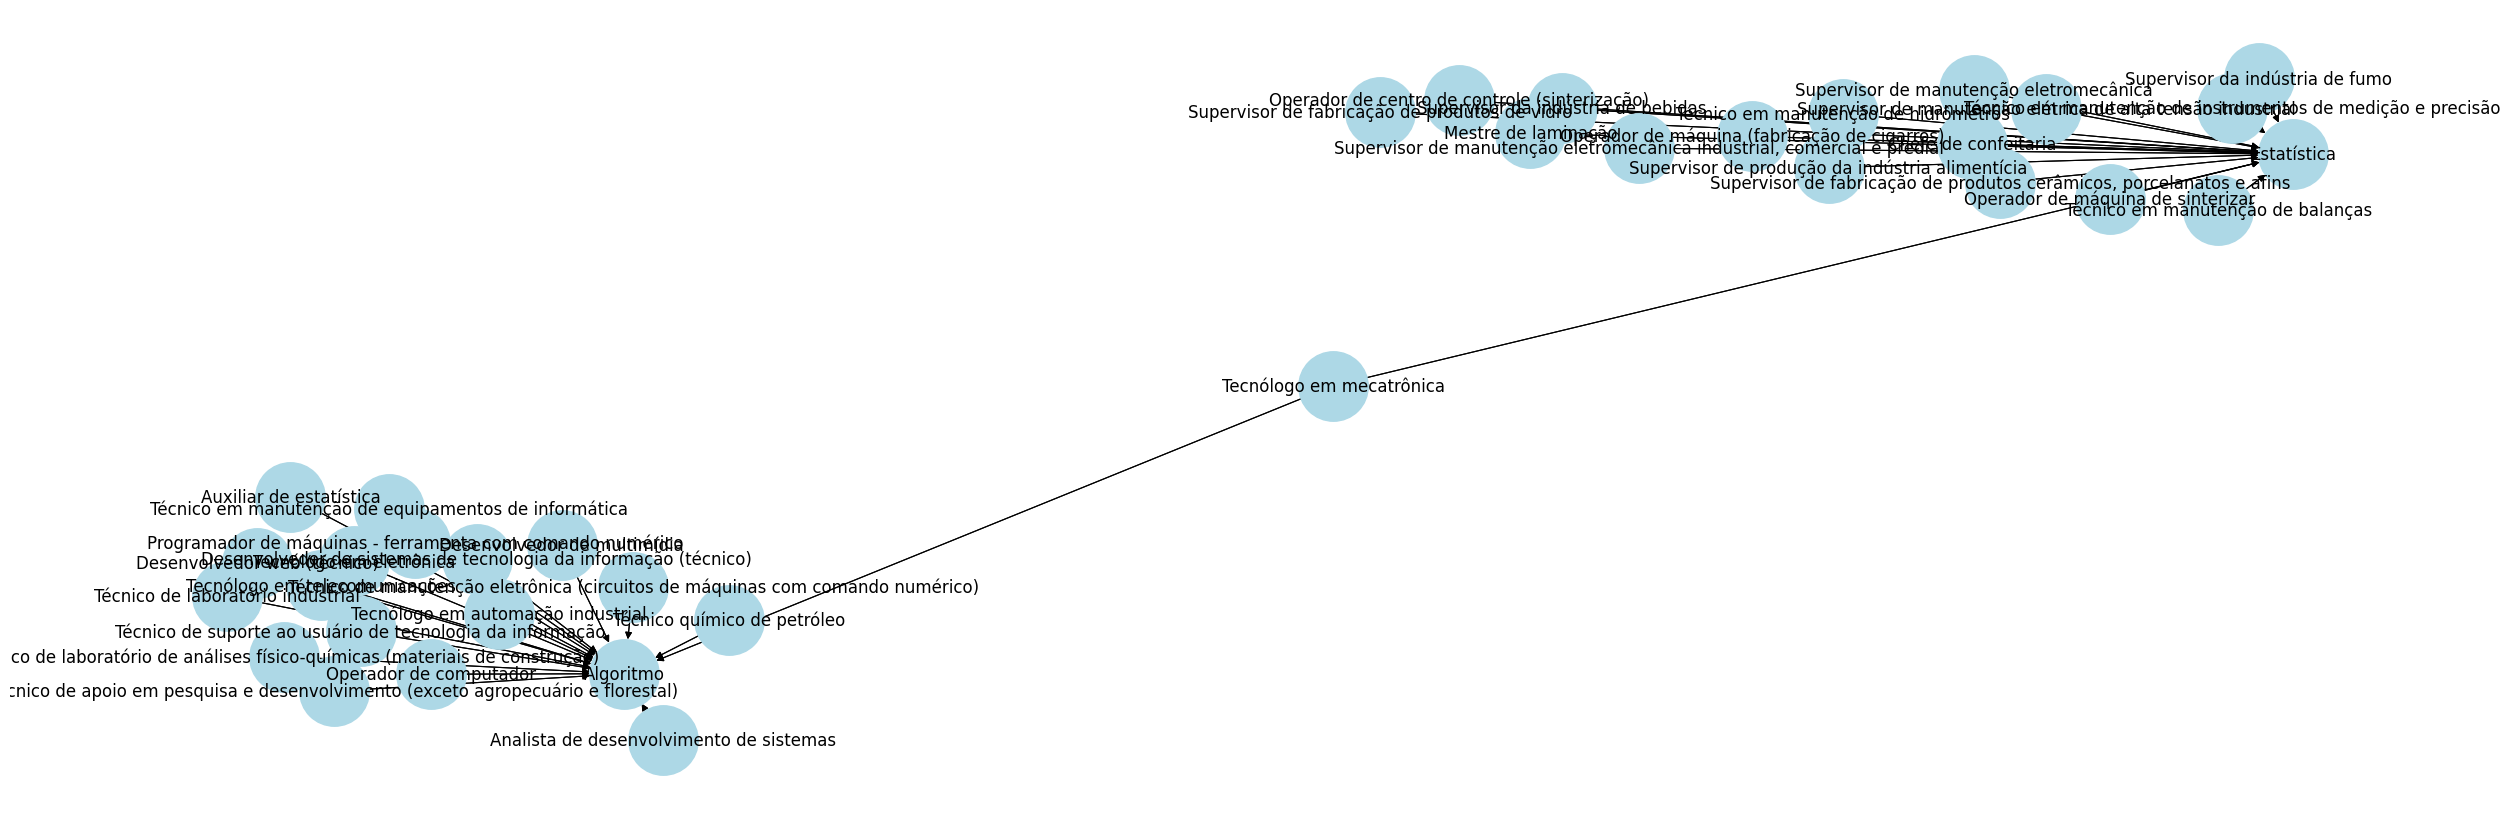

In [20]:
# Define the query to be run on the graph database
query = '''
   MATCH (occupation)-[r:DEPTH]-(knowledge)-[x:FREQUENCY]-(occupation)-[i:IMPORTANCE]-(knowledge)
   WHERE r.level IN [2,3,4] AND x.level IN [3,4,5] AND  i.level IN [3,4,5] AND knowledge.name IN ["Algoritmo", "Estatística"]
   RETURN occupation, r,  knowledge, x
'''
# Use a graph builder to create a visualization of the results of the query
# The builder will limit the number of entities returned to 35 and label nodes with their "name" property
g = graph_builder.build(query=query, property_node="name", limit_entities_return=35)